In [129]:
#base
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Two Interfaces

#### MATLAB-style state-based interface

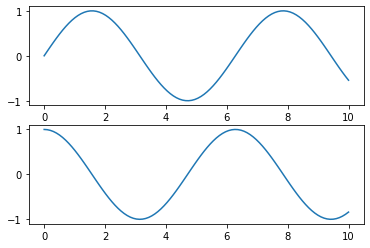

In [2]:
x = np.linspace(0, 10, 100)

plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

#### Object-oriented interface

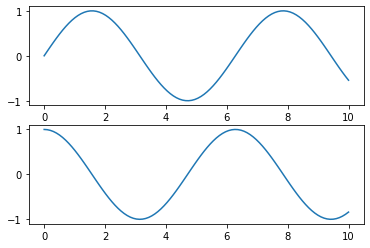

In [3]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

### Simple Line Plots

#### MATLAB-style Interface

figure, axes 객체를 생성하며 시작한다.

``figure`` : 모든 그림 요소들(graphics, text, labels)

``axes`` : 사각형 박스(ticks, labels, ...)

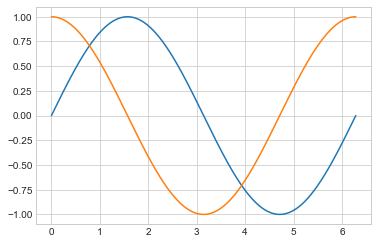

In [2]:
fig = plt.figure()
ax=plt.axes()
x=np.linspace(0,2*np.pi,1000)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

##### color

color name, short color code (rgbcmyk), grayscale (0-1), Hex code (#RRGGBB, 00-FF), RGB tuple(0-1, 0-1, 0-1), HTML color name

``'blue', 'g', '0.75', '#FFDD44', (1.0, 0.2, 0.3), 'chartreuse'``

##### line style

solid, dashed, dashdot, dotted

``'-', '--', '-.', ':'``

(-1.0, 4.0)

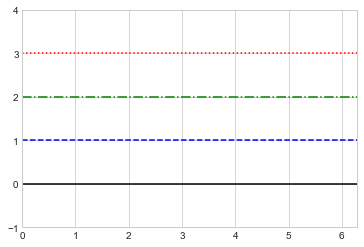

In [11]:
zero=np.zeros(1000)
for style in ['-k', '--b', '-.g', ':r']:
    plt.plot(x, zero, style)
    zero+=1
plt.xlim(0,np.pi*2)
plt.ylim(-1,4)

##### axes limits

``plt.xlim(xmin, xmax)``

``plt.ylim(ymin, ymax)``

ymin>ymax 이면 축이 거꾸로 변한다.


양 축을 한꺼번에 처리 : ``plt.axis([xmin, xmax, ymin, ymax])``

(-1.0, 1.0, -5.0, 5.0)

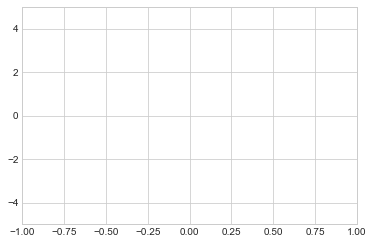

In [15]:
plt.axis([-1, 1, -5, 5])

축에 관한 layout : plt.axis(layout)

'``tight``', '``equal``', ...

##### labeling plots

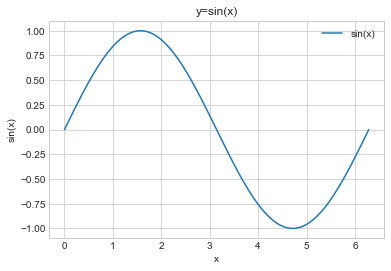

In [17]:
plt.plot(x, np.sin(x), label='sin(x)')
plt.title('y=sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()

#### Object-Oriented Interface

[(0.0, 6.283185307179586),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'y=sin(x)')]

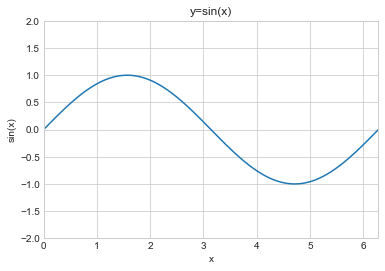

In [23]:
ax=plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,np.pi*2), ylim=(-2,2), xlabel='x', ylabel='sin(x)', title='y=sin(x)')

### Simple Scatter Plots

plt.plot이 plt.scatter보다 빠르므로 단순한 산점도는 plt.plot을 사용하는 것이 효율적이다.

#### by plt.plot

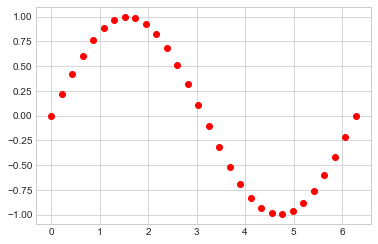

In [27]:
x=np.linspace(0, 2*np.pi, 30)
plt.plot(x, np.sin(x), 'o', color='red')

여러가지 marker들

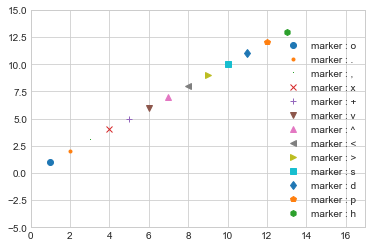

In [36]:
X,Y=1,1
plt.axis([0, 17, -5, 15])
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', 'p', 'h']:
    plt.plot(X, Y, marker, label='marker : %c'%(marker))
    X+=1; Y+=1
plt.legend(loc='lower right')

marker 속성

markersize : 크기, markerfacecolor : 마커 색상, markeredgecolor : 마커 테두리 색상, markeredgewidth : 마커 테두리 굵기

#### MATLAB-style Interface

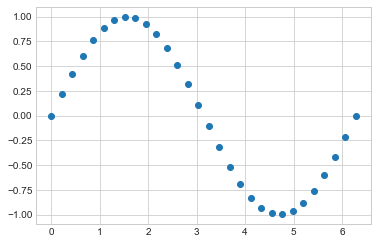

In [41]:
plt.scatter(x, np.sin(x), marker='o')

각 point의 속성이 개별적으로 다르게 표현될 수 있다.

c : color, s : size, alpha : 투명도, cmap : colormap

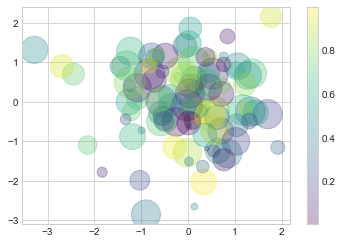

In [45]:
plt.scatter(np.random.randn(100), np.random.randn(100), c=np.random.rand(100), s=1000*np.random.rand(100), alpha=0.3, cmap='viridis')
plt.colorbar()

### Errorbars

xerr : x 오차범위, yerr : y 오차범위

fmt : 점 모양, color : 색상

ecolor : 에러바 색상, elinewidth : 에러바 굵기, capsize : 에러바 양 끝 수직선 길이

<ErrorbarContainer object of 3 artists>

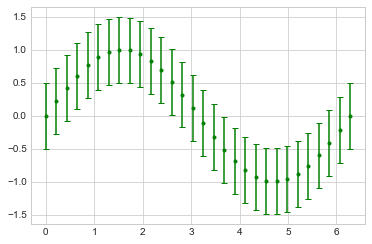

In [50]:
dy=0.5
plt.errorbar(x, np.sin(x), yerr=dy, fmt='.g', capsize=3)

### Histograms

##### One-Dimensional

bins : 막대 갯수, density : 전체를 1로 봤을 때의 비율로 표현

alpha : 투명도, histtype : 히스토그램 타입(stepfilled), color : 색상, edgecolor : 테두리 색상

(array([0.02617378, 0.00523476, 0.02093902, 0.03664329, 0.06805183,
        0.08375609, 0.08375609, 0.1779817 , 0.1779817 , 0.20415548,
        0.2250945 , 0.3193201 , 0.38737193, 0.34025913, 0.41354571,
        0.44495424, 0.35072864, 0.37166766, 0.39784144, 0.21462499,
        0.23032926, 0.18321645, 0.16227743, 0.11516463, 0.06805183,
        0.06281707, 0.03140853, 0.01046951, 0.01570427, 0.00523476]),
 array([-2.85414621, -2.66311533, -2.47208445, -2.28105358, -2.0900227 ,
        -1.89899182, -1.70796094, -1.51693006, -1.32589919, -1.13486831,
        -0.94383743, -0.75280655, -0.56177567, -0.3707448 , -0.17971392,
         0.01131696,  0.20234784,  0.39337872,  0.58440959,  0.77544047,
         0.96647135,  1.15750223,  1.34853311,  1.53956398,  1.73059486,
         1.92162574,  2.11265662,  2.3036875 ,  2.49471837,  2.68574925,
         2.87678013]),
 [<matplotlib.patches.Polygon at 0x20b595e6d60>])

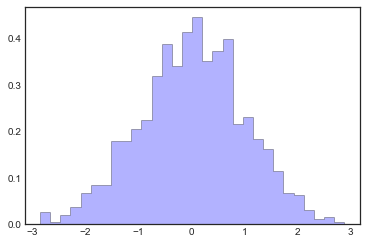

In [56]:
data=np.random.randn(1000)
plt.style.use('seaborn-white')
plt.hist(data, bins=30, density=True, alpha=0.3, histtype='stepfilled', color='blue', edgecolor='k')

단순 수치 정보

In [58]:
counts, bin_edges=np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 46 227 441 249  37]
[-2.85414621 -1.70796094 -0.56177567  0.58440959  1.73059486  2.87678013]


##### Two-Dimensional

마찬가지로 수치 정보는 np.hist2d

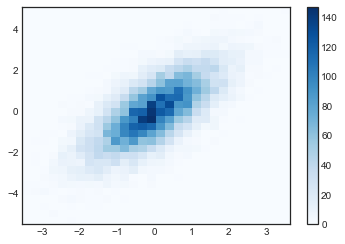

In [62]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
g=plt.hist2d(x, y, bins=30, cmap='Blues')
cb=plt.colorbar()

### Customize Legends & Colorbars

#### Legends

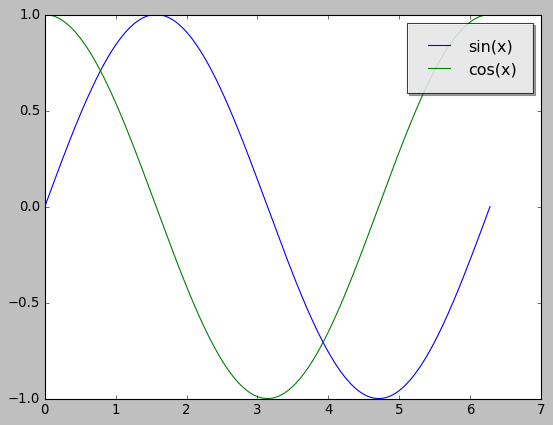

In [3]:
plt.style.use('classic')
fig, ax=plt.subplots()
x=np.linspace(0, np.pi*2, 1000)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend(fancybox=False, framealpha=0.75, shadow=True, borderpad=1)

loc : 위치 (upper/lower/center left/right/center or center)

ncol :  한 줄당 표시 갯수

fancybox : ?, framealpha : 프레임 투명도, shadow : 뒷 배경, borderpad : 범례 크기

#### Colorbars

범례와 달리 연속값에 대한 표지를 위한 도구

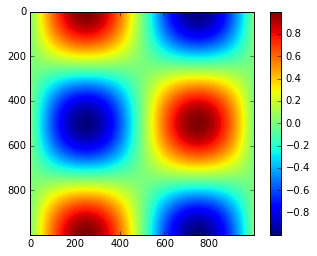

In [7]:
plt.style.use('classic')
%matplotlib inline
I=np.sin(x)*(np.cos(x[:, np.newaxis]))
plt.imshow(I)
plt.colorbar()

### Multiple Subplots

##### basic subplots

plt.axes 로 여러 axes를 생성할 수 있다.

plt.axes([left, bottom, width, height]) 좌표, 가로세로길이

fig.add_axes() : object-oriented interface

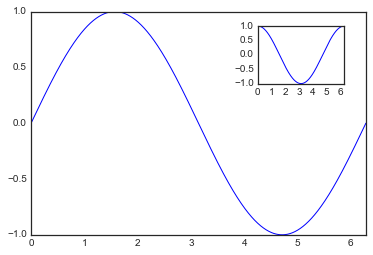

In [24]:
plt.style.use('seaborn-white')
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax1.set(xlim=(0, np.pi*2)); ax2.set(xlim=(0, np.pi*2))
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

##### grid subplots

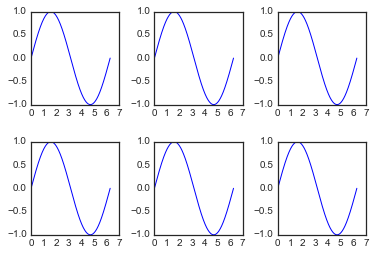

In [29]:
plt.subplots_adjust(hspace=0.4, wspace=0.4) #간격 조절
for i in range(1,7): 
    a=plt.subplot(2,3,i) 
    a.plot(x, np.sin(x))

한꺼번에 만들기

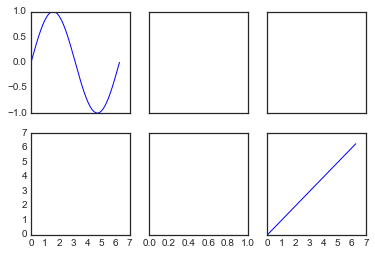

In [32]:
fig, ax=plt.subplots(2, 3, sharex='col', sharey='row')
ax[0,0].plot(x, np.sin(x))
ax[1,2].plot(x, x)

##### gridspec

같은 크기가 아닌 subplot

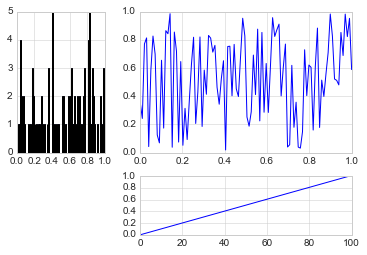

In [81]:
grid=plt.GridSpec(3,3,wspace=0.4, hspace=0.4)
x=np.linspace(0,1, 100)
y=np.random.rand(100)

A=plt.subplot(grid[:2, 0])
B=plt.subplot(grid[:2, 1:])
C=plt.subplot(grid[2, 1:])

B.plot(x,y)
A.hist(y, bins=100)
C.plot(x)

### Text & Annotation

Text(3.9269908169872414, -0.7071067811865476, 'test2')

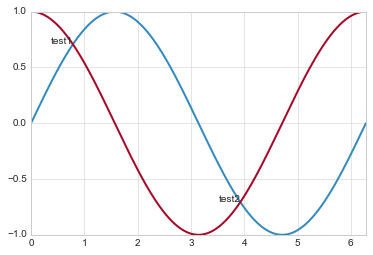

In [108]:
plt.style.use('seaborn-whitegrid')
plt.axis([0, 2*np.pi, -1, 1])
x=np.linspace(0,2*np.pi, 1000)
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.text(np.pi/4, np.sqrt(2)/2, "test1", ha='right')
plt.text(5*np.pi/4, -1*np.sqrt(2)/2, "test2", ha='right')

### Settings & Stylesheets

사용 가능한 style

In [100]:
print(plt.style.available[:])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


사용할 style 바꾸기 : ``plt.style.use(~)``

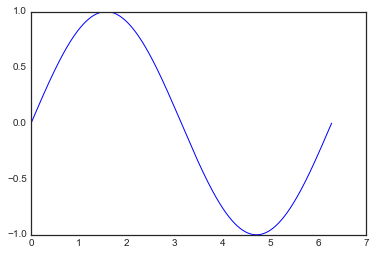

In [102]:
plt.style.use('seaborn-white')
plt.plot(x, np.sin(x))

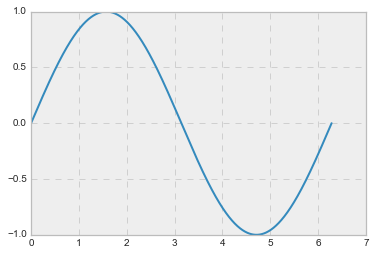

In [107]:
plt.style.use('bmh')
plt.plot(x, np.sin(x))

### Seaborn

##### relplot (relation)

In [120]:
sns.set_theme(style='darkgrid')
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


kind : plot의 종류. default는 scatter

hue : category 지정(색상 표현)

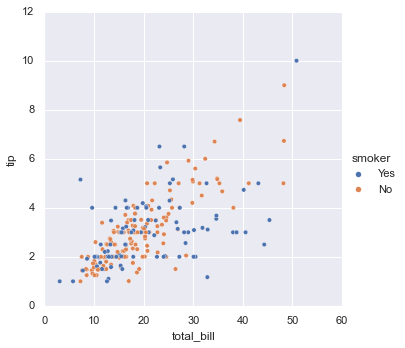

In [128]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', hue='smoker');

In [135]:
df=pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,0.289444
1,1,-0.403877
2,2,-1.653490
3,3,-2.451701
4,4,-2.392846


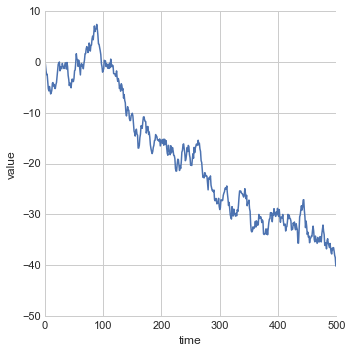

In [136]:
sns.relplot(x='time', y='value', kind='line', data=df)

In [138]:
fmri=sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


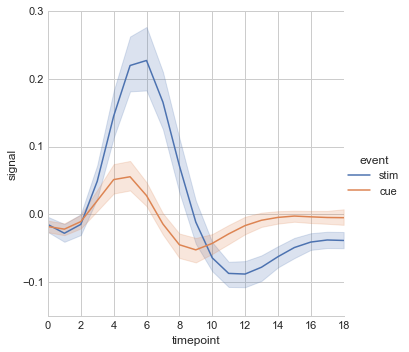

In [142]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue='event') #동일한 x값에 대해 bootstrapping에 의한 95% confidence interval

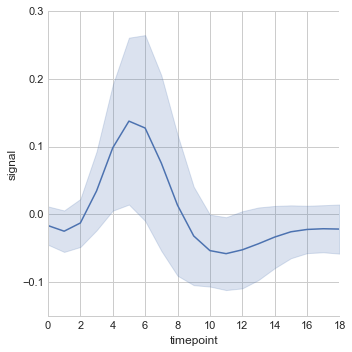

In [141]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri) #standard deviation

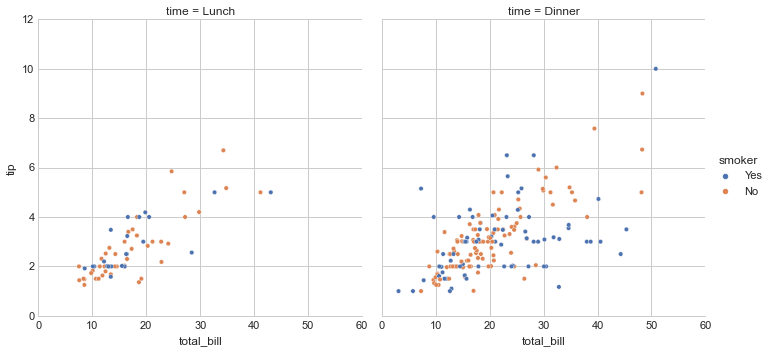

In [147]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

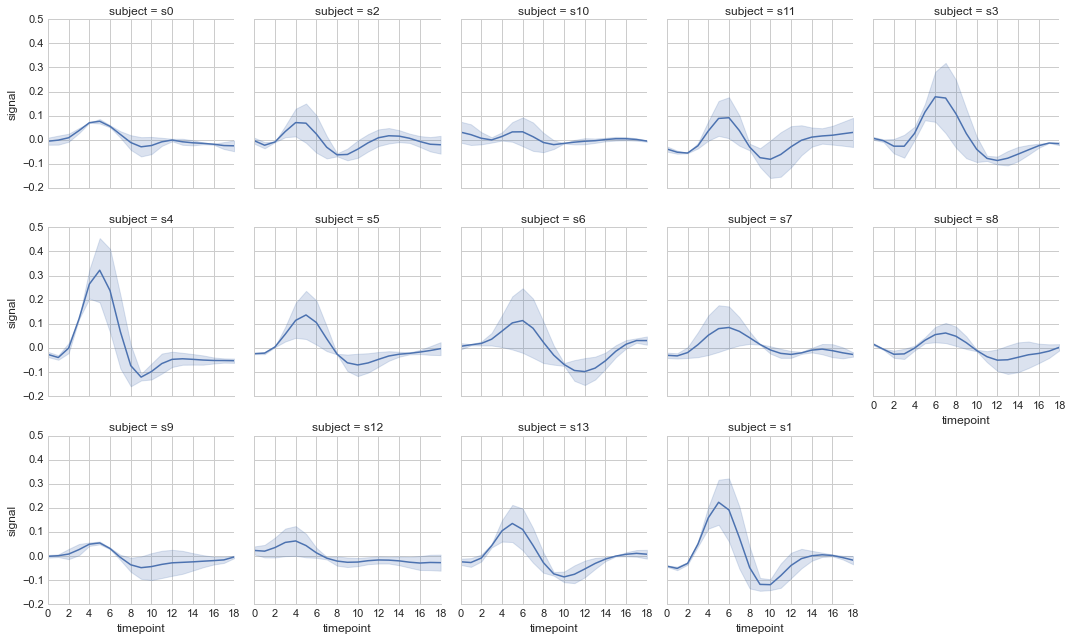

In [155]:
sns.relplot(x="timepoint", y="signal", data=fmri.query("region=='frontal'"), col="subject", col_wrap=5, height=3, kind='line')

##### displot (distributions)

In [157]:
penguins=sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


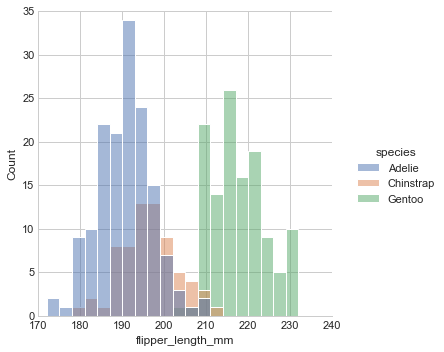

In [160]:
sns.displot(data=penguins, x="flipper_length_mm", bins=30, binwidth=3, hue='species')

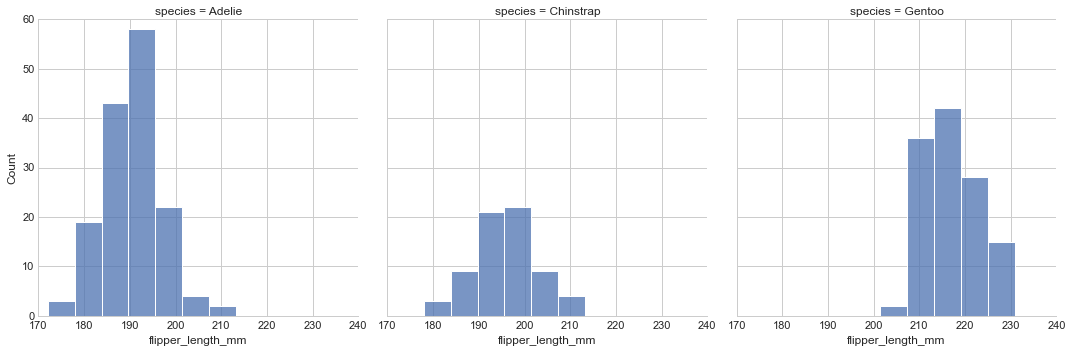

In [161]:
sns.displot(data=penguins, x="flipper_length_mm", col="species")

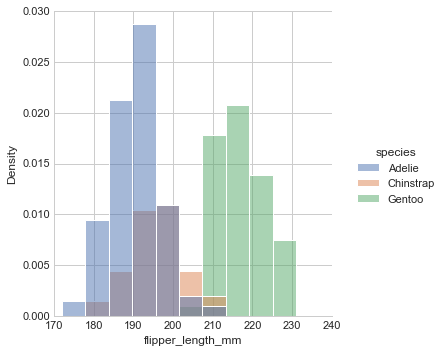

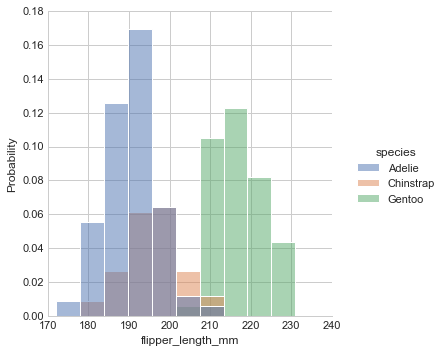

In [163]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", stat="density") #normalized (면적의 합이 1)
#sns.displot(data=penguins, x="flipper_length_mm", hue="species", stat="probability") #y값의 합이 1

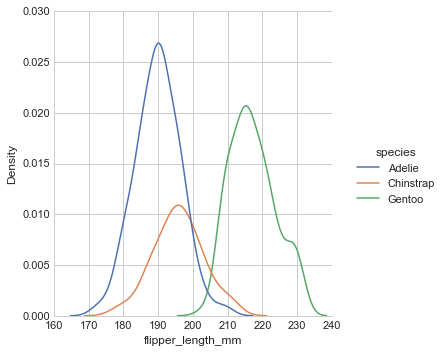

In [165]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

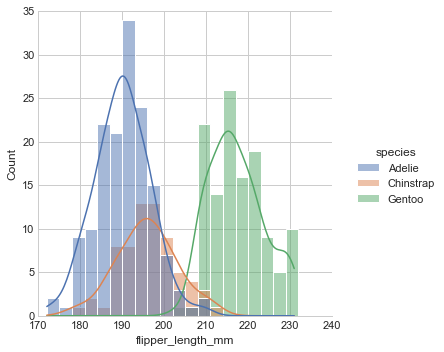

In [166]:
sns.displot(data=penguins, x="flipper_length_mm", bins=30, binwidth=3, hue='species', kde=True) #hist + kde

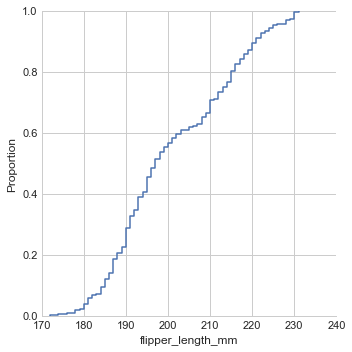

In [167]:
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

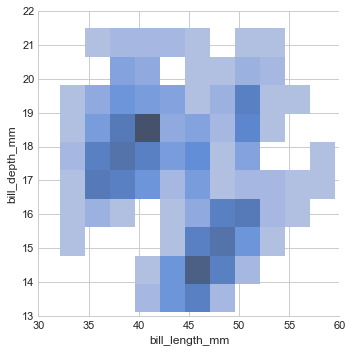

In [168]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

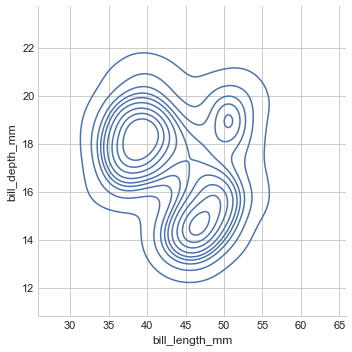

In [169]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

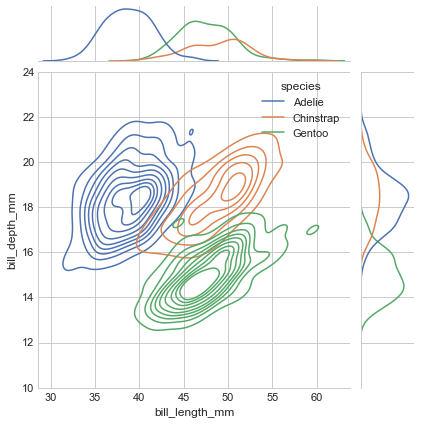

In [174]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

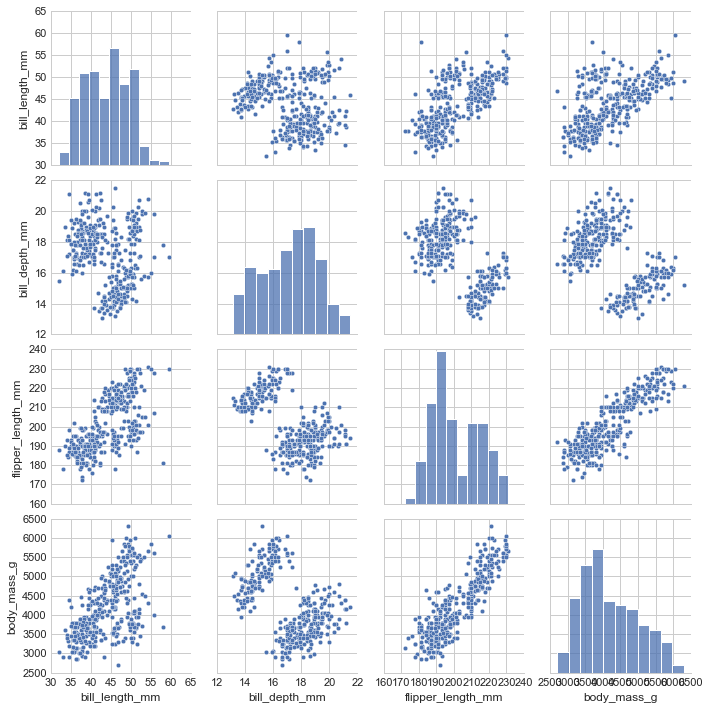

In [175]:
sns.pairplot(penguins)

##### catplot (categorical)

In [177]:
sns.set_theme(style="ticks", color_codes=True)

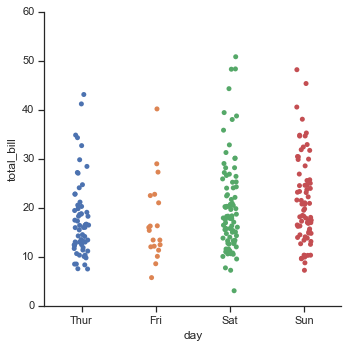

In [178]:
sns.catplot(x="day", y="total_bill", data=tips)

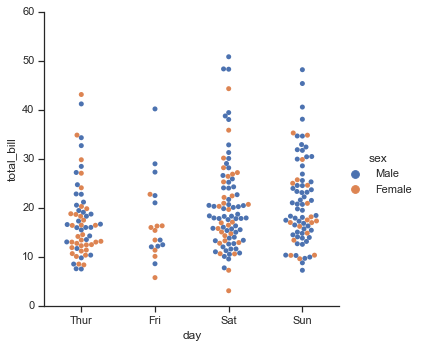

In [180]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

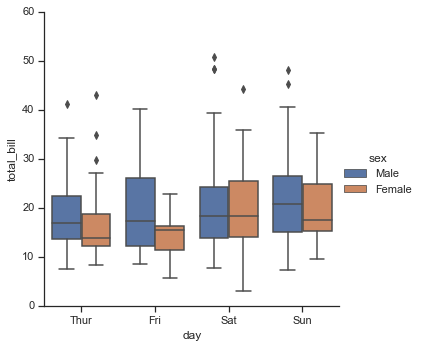

In [181]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips)

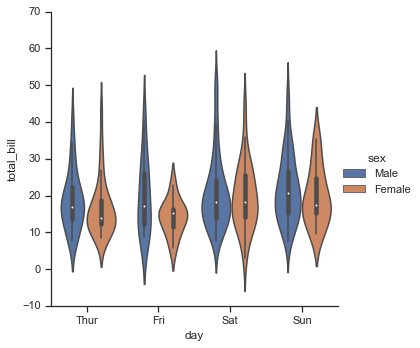

In [182]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=tips)

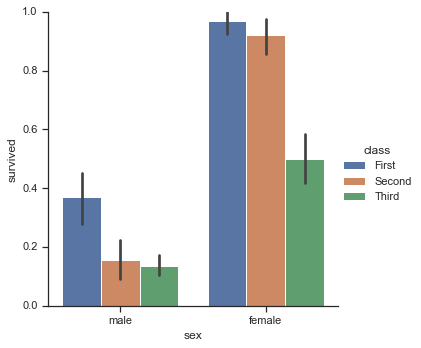

In [183]:
titanic=sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

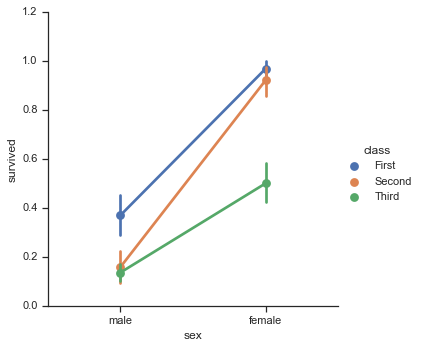

In [184]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

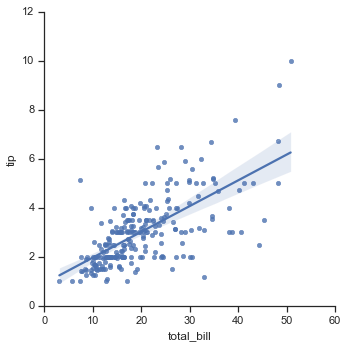

In [185]:
sns.lmplot(x="total_bill", y="tip", data=tips);

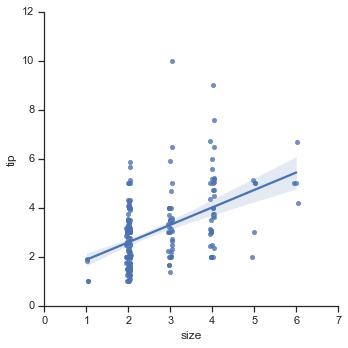

In [186]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

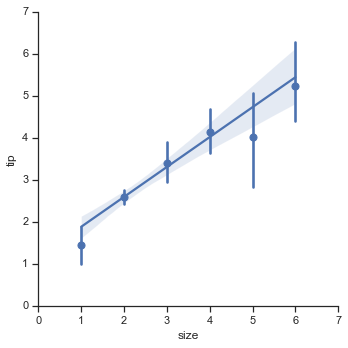

In [187]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

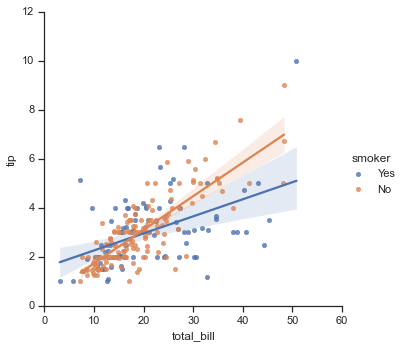

In [188]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips); 

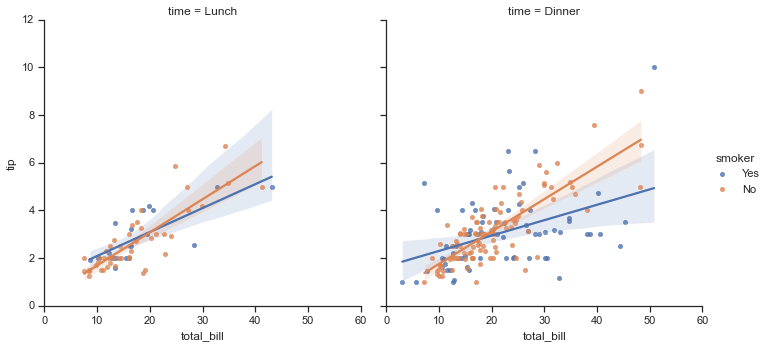

In [189]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

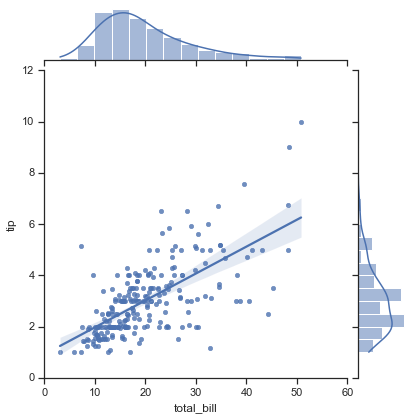

In [190]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");